In [77]:
import os
os.getcwd()

'/Users/yihuang/Downloads/Database 2'

In [78]:
os.listdir()

['.DS_Store', 'Unemployment.db']

In [79]:
os.chdir('/Users/yihuang/Downloads/Database 2')

In [80]:
os.listdir()

['.DS_Store', 'Unemployment.db']

In [2]:
from IPython.display import display, HTML
import pandas as pd
import sqlite3
from sqlite3 import Error
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import json
from urllib.request import urlopen

def create_connection(db_file, delete_db=False):
    import os
    if delete_db and os.path.exists(db_file):
        os.remove(db_file)

    conn = None
    try:
        conn = sqlite3.connect(db_file)
        conn.execute("PRAGMA foreign_keys = 1")
    except Error as e:
        print(e)

    return conn
##Create Tables
conn = create_connection('Unemployment.db')
sql_statement = "select * from Unemployment where year = 2020 or year =2019;"
df = pd.read_sql_query(sql_statement, conn)
display(df)

conn = create_connection('Unemployment.db')
sql_statement = "select * from income;"
df1 = pd.read_sql_query(sql_statement, conn)
display(df)

#Join Tables
df1['Name of County']= df1['Name of County'].astype(str)
list_lower =[]
for county in df1['Name of County']:
    if 'County' in county.split():
        list_lower.append( county.replace(' County',''))
len(list_lower)
df1 = df1.rename(columns={'':'Median_Income'})
df2 = pd.DataFrame()
df2['County'] = list_lower
df2['Median_Income'] = df1['Median_Income'].tolist()[:62]

main_df = df.merge(df2,on=['County'])
main_df


Year  Month                 Region        County  Beneficiaries  \
0     2020     10                Capital        Albany           7600   
1     2020     10       Western New York      Allegany            900   
2     2020     10          New York City         Bronx          79600   
3     2020     10          Southern Tier        Broome           5200   
4     2020     10       Western New York   Cattaraugus           2200   
5     2020     10       Central New York        Cayuga           1700   
6     2020     10       Western New York    Chautauqua           3200   
7     2020     10          Southern Tier       Chemung           2300   
8     2020     10          Southern Tier      Chenango           1000   
9     2020     10          North Country       Clinton           1800   
10    2020     10                Capital      Columbia           1100   
11    2020     10       Central New York      Cortland           1100   
12    2020     10          Southern Tier      Delaware            800   
13    2020     10          Hudson Valley      Dutchess           7000   
14    2020     10       Western New York          Erie          30800   
15    2020     10          North Country         Essex            600   
16    2020     10          North Country      Franklin           1000   
17    2020     10          Mohawk Valley        Fulton           1200   
18    2020     10           Finger Lakes       Genesee           1500   
19    2020     10                Capital        Greene           1100   
20    2020     10          North Country      Hamilton            100   
21    2020     10          Mohawk Valley      Herkimer           1700   
22    2020     10          North Country     Jefferson           2100   
23    2020     10          New York City         Kings         116800   
24    2020     10          North Country         Lewis            500   
25    2020     10           Finger Lakes    Livingston           1300   
26    2020     10       Central New York       Madison           1400   
27    2020     10           Finger Lakes        Monroe          24000   
28    2020     10          Mohawk Valley    Montgomery           1500   
29    2020     10            Long Island        Nassau          41900   
...    ...    ...                    ...           ...            ...   
1378  2019      1           Finger Lakes       Ontario           1300   
1379  2019      1          Hudson Valley        Orange           3100   
1380  2019      1           Finger Lakes       Orleans            600   
1381  2019      1       Central New York        Oswego           2100   
1382  2019      1          Mohawk Valley        Otsego            800   
1383  2019      1  Out-of-State Resident  Out-of-State          14800   
1384  2019      1          Hudson Valley        Putnam            700   
1385  2019      1          New York City        Queens          16400   
1386  2019      1                Capital    Rensselaer           1700   
1387  2019      1          New York City      Richmond           3500   
1388  2019      1          Hudson Valley      Rockland           1900   
1389  2019      1                Capital      Saratoga           2000   
1390  2019      1                Capital   Schenectady           1600   
1391  2019      1          Mohawk Valley     Schoharie            600   
1392  2019      1          Southern Tier      Schuyler            300   
1393  2019      1           Finger Lakes        Seneca            400   
1394  2019      1          Southern Tier       Steuben           1200   
1395  2019      1          North Country  St. Lawrence           1500   
1396  2019      1            Long Island       Suffolk          15900   
1397  2019      1          Hudson Valley      Sullivan            800   
1398  2019      1          Southern Tier         Tioga            500   
1399  2019      1          Southern Tier      Tompkins            600   
1400  2019      1          Hudson Valley        Ulster          

DatabaseError: Execution failed on sql 'select * from income;': no such table: income

In [3]:
dfpr1 = main_df[main_df['Year']==2019].groupby(['Month'])['Benefit_Amount'].mean()
vals = []
for i in list(range(1,13)) :
    vals.append(dfpr1[i])
vals
fig1 = go.Figure()
fig1.update_layout(title_text = 'Mean Beneficiary Amounts 2019 vs 2020')
fig1.add_trace(
    go.Scatter(x=main_df['Month'], y=main_df[main_df['Year']==2020].groupby(['Month'])['Benefit_Amount'].mean(),line=dict(color='firebrick', width=2), mode='lines',name="2020"))
fig1.add_trace(
    go.Scatter(x=list(range(1,13)), y=vals,line=dict(color='royalblue', width=2), mode='lines',name="2019"))

NameError: name 'main_df' is not defined

In [137]:
list_lower =[]
for county in df1['Name of County']:
    if 'County' in county.split():
        list_lower.append( county.replace(' County',''))
len(list_lower)

62

In [138]:
df_2020 = main_df[main_df['Year']==2020]
df_2019 = main_df[main_df['Year']==2019]

In [139]:
df1 = df1.rename(columns={'':'Median_Income'})
df2 = pd.DataFrame()

In [140]:
with urlopen('https://cugir.library.cornell.edu/download/file/cugir-007865-geojson.json') as response:
    counties = json.load(response)

In [141]:
counties

{'type': 'FeatureCollection',
 'features': [{'type': 'Feature',
   'id': 'cugir007865.1',
   'geometry': {'type': 'MultiPolygon',
    'coordinates': [[[[-74.712396, 44.953008],
       [-74.711132, 44.953008],
       [-74.691251, 44.953],
       [-74.690671, 44.952909],
       [-74.689482, 44.9529],
       [-74.668382, 44.952777],
       [-74.667773, 44.95277],
       [-74.641872, 44.952621],
       [-74.636018, 44.910792],
       [-74.635172, 44.904471],
       [-74.63121, 44.875391],
       [-74.63048, 44.869393],
       [-74.629994, 44.865378],
       [-74.629519, 44.861096],
       [-74.629231, 44.859404],
       [-74.628731, 44.857004],
       [-74.628559, 44.856249],
       [-74.626236, 44.838506],
       [-74.625049, 44.830346],
       [-74.62294, 44.815154],
       [-74.622615, 44.812766],
       [-74.622537, 44.812195],
       [-74.621928, 44.807683],
       [-74.619921, 44.792855],
       [-74.617402, 44.774552],
       [-74.614223, 44.752374],
       [-74.613318, 44.74575],
 

In [142]:
for i in range(len(counties['features'])) :
    print(counties['features'][i]['properties']['name'])

St. Lawrence
Jefferson
Clinton
Franklin
Essex
Lewis
Hamilton
Orleans
Herkimer
Washington
Warren
Montgomery
Oswego
Allegany
Oneida
Cayuga
Fulton
Saratoga
Niagara
Genesee
Erie
Monroe
Wayne
Onondaga
Madison
Ontario
Seneca
Livingston
Columbia
Rensselaer
Schenectady
Suffolk
Otsego
Suffolk
Wyoming
Schoharie
Albany
Cortland
Yates
Chenango
Richmond
Tompkins
Steuben
Chautauqua
Schuyler
Cattaraugus
Delaware
Greene
Broome
Tioga
Chemung
Ulster
Dutchess
Bronx
Sullivan
Westchester
Orange
Putnam
Westchester
Rockland
Suffolk
New York
Kings
Nassau
Bronx
New York
Queens


In [143]:
main_df

Year  Month            Region    County  Beneficiaries  Benefit_Amount  \
0     2020     10           Capital    Albany           7600         7300000   
1     2020      9           Capital    Albany          11900        12250000   
2     2020      8           Capital    Albany          13600        15780000   
3     2020      7           Capital    Albany          15500        17580000   
4     2020      6           Capital    Albany          17500        24070000   
5     2020      5           Capital    Albany          16900        20690000   
6     2020      4           Capital    Albany          13300        15920000   
7     2020      3           Capital    Albany           4700         4020000   
8     2020      2           Capital    Albany           2100         2350000   
9     2020      1           Capital    Albany           2300         2460000   
10    2019     12           Capital    Albany           2000         2380000   
11    2019     11           Capital    Albany           1300         1440000   
12    2019     10           Capital    Albany           1200         1400000   
13    2019      9           Capital    Albany           1400         1410000   
14    2019      8           Capital    Albany           1600         1590000   
15    2019      7           Capital    Albany           1700         1950000   
16    2019      6           Capital    Albany           1500         1490000   
17    2019      5           Capital    Albany           1500         1550000   
18    2019      4           Capital    Albany           2000         2170000   
19    2019      3           Capital    Albany           2100         2350000   
20    2019      2           Capital    Albany           2200         2370000   
21    2019      1           Capital    Albany           2400         2580000   
22    2020     10  Western New York  Allegany            900          800000   
23    2020      9  Western New York  Allegany           1200         1270000   
24    2020      8  Western New York  Allegany           1500         1650000   
25    2020      7  Western New York  Allegany           2000         1900000   
26    2020      6  Western New York  Allegany           2200         2680000   
27    2020      5  Western New York  Allegany           2200         2470000   
28    2020      4  Western New York  Allegany           1900         2150000   
29    2020      3  Western New York  Allegany            900          910000   
...    ...    ...               ...       ...            ...             ...   
1334  2019      8      Finger Lakes   Wyoming            300          220000   
1335  2019      7      Finger Lakes   Wyoming            300          280000   
1336  2019      6      Finger Lakes   Wyoming            200          190000   
1337  2019      5      Finger Lakes   Wyoming            300          260000   
1338  2019      4      Finger Lakes   Wyoming            500          510000   
1339  2019      3      Finger Lakes   Wyoming            700          730000   
1340  2019      2      Finger Lakes   Wyoming            700          790000   
1341  2019      1      Finger Lakes   Wyoming            800          880000   
1342  2020     10      Finger Lakes     Yates            400          330000   
1343  2020      9      Finger Lakes     Yates            600          580000   
1344  2020      8      Finger Lakes     Yates            800          820000   
1345  2020      7      Finger Lakes     Yates           1000          970000   
1346  2020      6      Finger Lakes     Yates           1200         1350000   
1347  2020      5      Finger Lakes     Yates           1300         1430000   
1348  2020      4      Finger Lakes     Yates           1200         1490000   
1349  2020      3      Finger Lakes     Yates            600          480000   
1350  2020      2      Finger Lakes     Yates            300          320000   
1351  2020      1      Finger Lakes     Yates            300          290000   
1352  

In [144]:
inc = main_df['Median_Income'].tolist()
for i in range(len(inc)) :
    inc[i]=inc[i].replace(',','')
main_df['Median_Income'] = inc
main_df['Median_Income'] = main_df['Median_Income'].astype(int)
main_df

Year  Month            Region    County  Beneficiaries  Benefit_Amount  \
0     2020     10           Capital    Albany           7600         7300000   
1     2020      9           Capital    Albany          11900        12250000   
2     2020      8           Capital    Albany          13600        15780000   
3     2020      7           Capital    Albany          15500        17580000   
4     2020      6           Capital    Albany          17500        24070000   
5     2020      5           Capital    Albany          16900        20690000   
6     2020      4           Capital    Albany          13300        15920000   
7     2020      3           Capital    Albany           4700         4020000   
8     2020      2           Capital    Albany           2100         2350000   
9     2020      1           Capital    Albany           2300         2460000   
10    2019     12           Capital    Albany           2000         2380000   
11    2019     11           Capital    Albany           1300         1440000   
12    2019     10           Capital    Albany           1200         1400000   
13    2019      9           Capital    Albany           1400         1410000   
14    2019      8           Capital    Albany           1600         1590000   
15    2019      7           Capital    Albany           1700         1950000   
16    2019      6           Capital    Albany           1500         1490000   
17    2019      5           Capital    Albany           1500         1550000   
18    2019      4           Capital    Albany           2000         2170000   
19    2019      3           Capital    Albany           2100         2350000   
20    2019      2           Capital    Albany           2200         2370000   
21    2019      1           Capital    Albany           2400         2580000   
22    2020     10  Western New York  Allegany            900          800000   
23    2020      9  Western New York  Allegany           1200         1270000   
24    2020      8  Western New York  Allegany           1500         1650000   
25    2020      7  Western New York  Allegany           2000         1900000   
26    2020      6  Western New York  Allegany           2200         2680000   
27    2020      5  Western New York  Allegany           2200         2470000   
28    2020      4  Western New York  Allegany           1900         2150000   
29    2020      3  Western New York  Allegany            900          910000   
...    ...    ...               ...       ...            ...             ...   
1334  2019      8      Finger Lakes   Wyoming            300          220000   
1335  2019      7      Finger Lakes   Wyoming            300          280000   
1336  2019      6      Finger Lakes   Wyoming            200          190000   
1337  2019      5      Finger Lakes   Wyoming            300          260000   
1338  2019      4      Finger Lakes   Wyoming            500          510000   
1339  2019      3      Finger Lakes   Wyoming            700          730000   
1340  2019      2      Finger Lakes   Wyoming            700          790000   
1341  2019      1      Finger Lakes   Wyoming            800          880000   
1342  2020     10      Finger Lakes     Yates            400          330000   
1343  2020      9      Finger Lakes     Yates            600          580000   
1344  2020      8      Finger Lakes     Yates            800          820000   
1345  2020      7      Finger Lakes     Yates           1000          970000   
1346  2020      6      Finger Lakes     Yates           1200         1350000   
1347  2020      5      Finger Lakes     Yates           1300         1430000   
1348  2020      4      Finger Lakes     Yates           1200         1490000   
1349  2020      3      Finger Lakes     Yates            600          480000   
1350  2020      2      Finger Lakes     Yates            300          320000   
1351  2020      1      Finger Lakes     Yates            300          290000   
1352  

In [145]:
fig = px.choropleth(main_df, geojson=counties, locations='County', color='Median_Income',
                           range_color=(0, main_df['Median_Income'].max()),
                           scope="usa",featureidkey="properties.name",
                    
                           labels={'Median_Income':'Median Income per County'}
                          )

In [146]:
fig.show()

In [147]:
main_df['County'].unique().tolist()

['Albany',
 'Allegany',
 'Bronx',
 'Broome',
 'Cattaraugus',
 'Cayuga',
 'Chautauqua',
 'Chemung',
 'Chenango',
 'Clinton',
 'Columbia',
 'Cortland',
 'Delaware',
 'Dutchess',
 'Erie',
 'Essex',
 'Franklin',
 'Fulton',
 'Genesee',
 'Greene',
 'Hamilton',
 'Herkimer',
 'Jefferson',
 'Kings',
 'Lewis',
 'Livingston',
 'Madison',
 'Monroe',
 'Montgomery',
 'Nassau',
 'New York',
 'Niagara',
 'Oneida',
 'Onondaga',
 'Ontario',
 'Orange',
 'Orleans',
 'Oswego',
 'Otsego',
 'Putnam',
 'Queens',
 'Rensselaer',
 'Richmond',
 'Rockland',
 'Saratoga',
 'Schenectady',
 'Schoharie',
 'Schuyler',
 'Seneca',
 'Steuben',
 'St. Lawrence',
 'Suffolk',
 'Sullivan',
 'Tioga',
 'Tompkins',
 'Ulster',
 'Warren',
 'Washington',
 'Wayne',
 'Westchester',
 'Wyoming',
 'Yates']

In [148]:
coun = main_df['County'].unique().tolist()
mean_amount = []
for c in coun :
    mean_amount.append(df_2020[df_2020['County']==c]['Benefit_Amount'].mean())
dd = pd.DataFrame()
dd['County']= coun
dd['Benefit_Amount']=mean_amount

In [149]:
df_2020[df_2020['County']=='Albany']['Benefit_Amount'].mean()

12242000.0

In [150]:
coun = main_df['County'].unique().tolist()
mean_amount = []
for c in coun :
    mean_amount.append(df_2020[df_2020['County']==c]['Benefit_Amount'].mean())
dd = pd.DataFrame()
dd['County']= coun
dd['Benefit_Amount']=mean_amount

fig = px.choropleth(dd, geojson=counties, locations='County', color='Benefit_Amount',
                           range_color=(dd['Benefit_Amount'].min(), dd['Benefit_Amount'].max()),
                           scope="usa",featureidkey="properties.name",
                    
                           labels={'Benefit_Amount':'Benefit Amount per County'}
                          )

In [151]:
fig.show()

In [152]:
coun = main_df['County'].unique().tolist()
mean_amount = []
for c in coun :
    mean_amount.append(df_2019[df_2019['County']==c]['Benefit_Amount'].mean())
dd = pd.DataFrame()
dd['County']= coun
dd['Benefit_Amount']=mean_amount

fig = px.choropleth(dd, geojson=counties, locations='County', color='Benefit_Amount',
                           range_color=(dd['Benefit_Amount'].min(), dd['Benefit_Amount'].max()),
                           scope="usa",featureidkey="properties.name",
                    
                           labels={'Benefit_Amount':'Benefit Amount per County'}
                          )

fig.show()

In [7]:
import matplotlib.pyplot as plt
import matplotlib as mpl_dates
from datetime import datetime, timedelta
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA

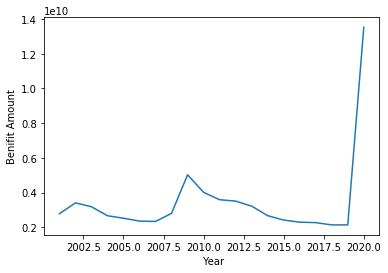

In [8]:
sql_statement = '''select year,
                    sum(Benefit_Amount) as Benifit_Amount
                    from Unemployment 
                    group by year
                    limit 20;'''
df = pd.read_sql_query(sql_statement, conn)
#display(df)

x = df['Year']
y = df['Benifit_Amount']
plt.plot(x,y)
plt.ylabel('Benifit Amount')
plt.xlabel(' Year')
#plt.legend([''])
plt.show()

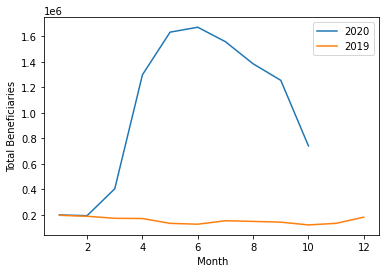

In [9]:
sql_statement = '''select month,
                    sum(Beneficiaries) as Beneficiaries
                    from unemployment 
                    where year = 2020
                    group by month  ;'''

sql_statement1 = '''select month,
                    sum(Beneficiaries) as Beneficiaries
                    from unemployment 
                    where year = 2019
                    group by month  ;'''
df_2020 = pd.read_sql_query(sql_statement, conn)
df_2019 = pd.read_sql_query(sql_statement1, conn)

plt.plot(df_2020['Month'],df_2020['Beneficiaries'])
plt.plot(df_2019['Month'],df_2019['Beneficiaries'])
plt.ylabel('Total Beneficiaries')
plt.xlabel(' Month')
plt.legend([2020,2019])
plt.show()

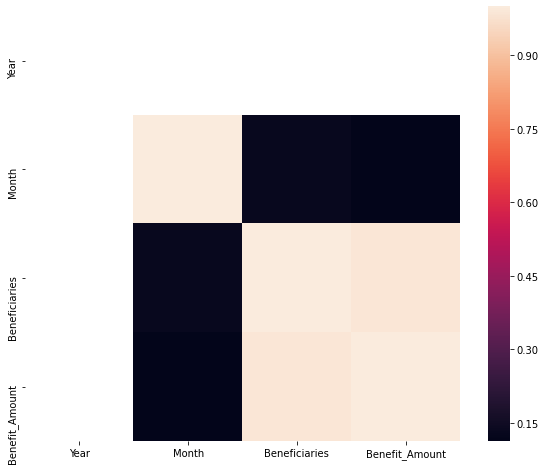

In [10]:
sql_statement = "select * from unemployment where year = 2020"

df = pd.read_sql_query(sql_statement, conn)
#display(df)
#print([type(ele) for ele in df['Beneficiaries']])
f, ax = plt.subplots(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr,
            mask=np.zeros_like(corr, dtype=np.bool), 
            square=True, ax=ax)


Date  Beneficiaries
0  2001-1         237700
1  2001-2         223100
2  2001-3         232000
3  2001-4         236300
4  2001-5         210300

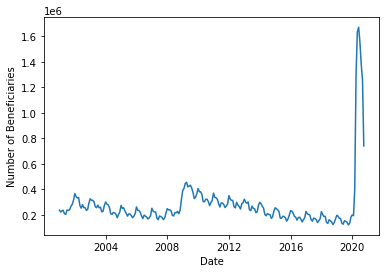

In [12]:
from datetime import datetime
from matplotlib.pylab import rcParams
sql_statement = '''select Year||'-'|| month as Date,  
                    sum(Beneficiaries) as Beneficiaries 
                    from unemployment  
                     group by year,month 
                     order by year,month
                     limit 238'''

df = pd.read_sql_query(sql_statement, conn)
display(df.head())
df['Date'] = pd.to_datetime(df['Date'], infer_datetime_format= True)
indexedDataset =df.set_index(['Date'])
plt.xlabel("Date")
plt.ylabel("Number of Beneficiaries")
plt.plot(indexedDataset)
plt.show()

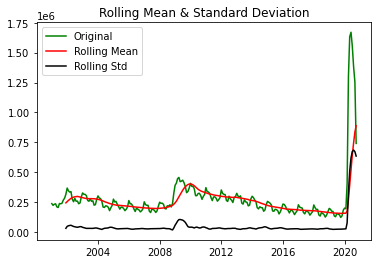

In [13]:
#determining the rolling stastics
rolmean = indexedDataset.rolling(window =12).mean()
rolstd = indexedDataset.rolling(window =12).std()

#display(rolmean,rolstd)
#plot rolling statistics
orig = plt.plot(indexedDataset,color ='green',label = 'Original')
mean = plt.plot(rolmean,color ='red',label = 'Rolling Mean')
std = plt.plot(rolstd,color ='black',label = 'Rolling Std')
plt.legend(loc = 'best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block =False)

In [14]:
#Perform Dickey-Fuller test:
from statsmodels.tsa.stattools import adfuller

print('Results of Dickey-Fuller Test:')
dftest = adfuller(indexedDataset['Beneficiaries'], autolag = 'AIC')

dfoutput = pd.Series(dftest[0:4], index = ['Test Statistic', 'p-value', '#Lags Used','No of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)' %key] = value
    
print(dfoutput)


Results of Dickey-Fuller Test:
Test Statistic              -1.844086
p-value                      0.358804
#Lags Used                  13.000000
No of Observations Used    224.000000
Critical Value (1%)         -3.459885
Critical Value (5%)         -2.874531
Critical Value (10%)        -2.573694
dtype: float64


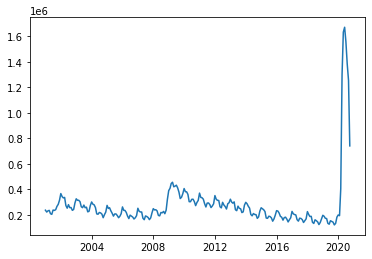

In [16]:
#Estimating trend
indexedDataset_logScale = np.logaddexp2( indexedDataset,0)
plt.plot(indexedDataset_logScale)
plt.show()

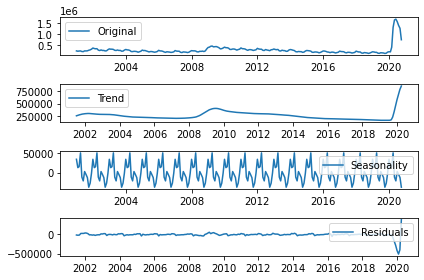

In [18]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(indexedDataset_logScale)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(indexedDataset_logScale, label = 'Original')
plt.legend(loc = 'best')
plt.subplot(412)
plt.plot(trend,label = 'Trend')
plt.legend(loc = 'best')
plt.subplot(413)
plt.plot(seasonal,label = 'Seasonality')
plt.legend(loc = 'best')
plt.subplot(414)
plt.plot(residual,label = 'Residuals')
plt.legend(loc = 'best')
plt.tight_layout()


decomposedLogData = residual
decomposedLogData.dropna(inplace = True)
#test_stationarity(decomposedLogData)

In [27]:
datasetLogDiffShifting = indexedDataset_logScale - indexedDataset_logScale.shift()
#plt.plot(datasetLogDiffShifting)
#plt.show()

D:\Users\subhash\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:541: FutureWarning:

fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.



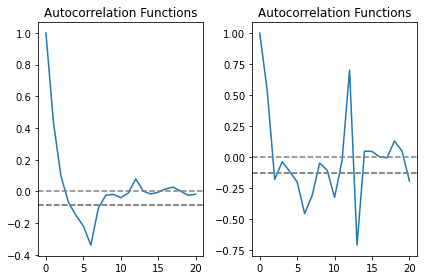

In [21]:
datasetLogDiffShifting.dropna(inplace = True)
#ACF and PACF plots:

from statsmodels.tsa.stattools import acf,pacf

lag_acf = acf(datasetLogDiffShifting, nlags = 20)
lag_pacf = pacf(datasetLogDiffShifting, nlags = 20, method = 'ols')


#plot ACF
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle = '--', color = 'gray')
plt.axhline(y=-1.36/np.sqrt(len(datasetLogDiffShifting)),linestyle = '--', color = 'gray')
plt.axhline(y=-1.36/np.sqrt(len(datasetLogDiffShifting)),linestyle = '--', color = 'gray')
plt.title("Autocorrelation Functions")

#plot PACF
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle = '--', color = 'gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle = '--', color = 'gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle = '--', color = 'gray')
plt.title("Autocorrelation Functions")

plt.tight_layout()


In [30]:
from statsmodels.tsa.arima_model import ARIMA

#AR MODEL
model = ARIMA(indexedDataset_logScale, order=(2,1,2))
results_AR = model.fit(disp = -1)
#plt.plot(datasetLogDiffShifting)
#plt.plot(results_AR.fittedvalues, color = 'red')
#plt.title('RSS: %.4f'% sum(results_AR.fittedvalues-datasetLogDiffShifting['Beneficiaries'])**2)
#print('Plotting AR model')


D:\Users\subhash\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

D:\Users\subhash\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



D:\Users\subhash\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

D:\Users\subhash\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



Plotting AR model


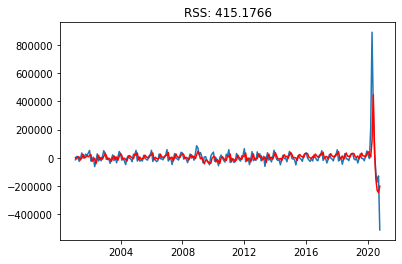

In [23]:
#ARIMA MODEL
model = ARIMA(indexedDataset_logScale, order=(2,1,2))
results_ARIMA = model.fit(disp = -1)
plt.plot(datasetLogDiffShifting)
plt.plot(results_AR.fittedvalues, color = 'red')
plt.title('RSS: %.4f'% sum(results_AR.fittedvalues-datasetLogDiffShifting['Beneficiaries'])**0.5)
print('Plotting AR model')

In [29]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy =True)
#print(predictions_ARIMA_diff.head(5))

#Convert to cumulative sum
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
#print(predictions_ARIMA_diff_cumsum.head(5))

predictions_ARIMA_log = pd.Series(indexedDataset_logScale['Beneficiaries'].ix[0], index = indexedDataset_logScale.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value = 0)
#predictions_ARIMA_log.head(5)

D:\Users\subhash\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated



In [28]:
predictions_ARIMA = np.log10(predictions_ARIMA_log)
#plt.plot(indexedDataset)
#plt.plot(predictions_ARIMA)

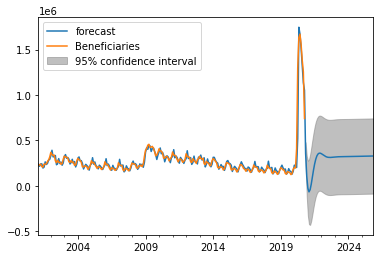

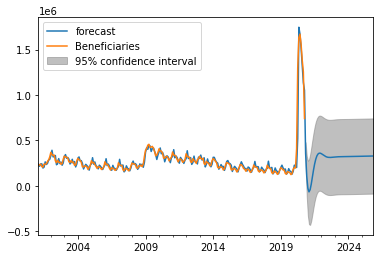

In [26]:
results_ARIMA.plot_predict(1,298)  #238 past rows + 60( next 5 years = 12months *5 years)
#display(results_ARIMA.forecast(steps = 120))